In [2]:
import pandas as pd

df = pd.read_csv('../datasets/2018_10_twitter_election_integrity/Iran/iranian_tweets_csv_hashed.csv')
df['tweetyear'] = df['tweet_time'].str[:4]
df.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,533622371429543936,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/divertissements/5757-ce...,[574356455],NaN
1,527205814906654721,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://www.awdnews.com/top-news/10080-an-inqu...,[438542436],NaN
2,545166827350134784,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://www.awdnews.com/political/10404-cia-pr...,"[823905, 256625456]",NaN
3,538045437316321280,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/divertissements/5796-to...,[919513172],NaN
4,530053681668841472,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,1.0,2.0,NaN,[http://fr.awdnews.com/soci%C3%A9t%C3%A9/5723-...,[83864876],NaN


In [67]:
df.dtypes

tweetid                       int64
userid                       object
user_display_name            object
user_screen_name             object
user_reported_location       object
user_profile_description     object
user_profile_url             object
follower_count                int64
following_count               int64
account_creation_date        object
account_language             object
tweet_language               object
tweet_text                   object
tweet_time                   object
tweet_client_name            object
in_reply_to_tweetid         float64
in_reply_to_userid           object
quoted_tweet_tweetid        float64
is_retweet                     bool
retweet_userid               object
retweet_tweetid             float64
latitude                    float64
longitude                   float64
quote_count                 float64
reply_count                 float64
like_count                  float64
retweet_count               float64
hashtags                    

Play with dataset a little. Questions / thoughts: 

* why does the volume dip in 2016? 
* Languages switch over the years. 2014, French dominates; after that stabilises on English then Arabic
* Top tweeters turn out to be impressively multilingual - wonder if we can use that as a tell? (more specifically, do they tweet in one language for a period of time then switch to another? Can we start spotting trollbots by their inconsistency over time perhaps?)
* Question: how much meaning is in the # content?  Like, are people using #this #is #a #message, or just using the hashtags to get amplification?  How the hashtags are used is quite interesting here
* Lots of 'news org' in the top-followed accounts. Are these real or fake? Is their output primarily message-based (e.g. for power), or url-based (e.g. for the advertising dollars)? (yes, yes, it could be both, but worth asking - URLs are a good vulnerability). 

This influence thing is interesting.  Lots of single tweets here. If you're running a network, you don't amplify your content with your other trollbots?  Is there a reason for that?  Do those non-amplified tweets get reach in a different way - perhaps by being well targetted, or being part of a set of related tweets, or being from very visible accounts? 

In [9]:
df['tweetyear'].value_counts().sort_index()

2010         1
2011         6
2012      5494
2013     14088
2014    229882
2015    248780
2016    112260
2017    290421
2018    222004
Name: tweetyear, dtype: int64

In [17]:
df[['userid', 'tweetyear', 'is_retweet']].pivot_table(columns='tweetyear', index='is_retweet', aggfunc='count')

userid                                                     \
tweetyear    2010 2011    2012     2013      2014      2015     2016   
is_retweet                                                             
False         1.0  6.0  5086.0  13943.0  228905.0  239738.0  95712.0   
True          NaN  NaN   408.0    145.0     977.0    9042.0  16548.0   

                                
tweetyear       2017      2018  
is_retweet                      
False       186301.0  120907.0  
True        104120.0  101097.0

userid                                                       \
tweet_language       ar     bg     bs     ca    cs     cy     da     de   el   
tweetyear                                                                      
2012                3.0    NaN    NaN    NaN   NaN    NaN    2.0    3.0  NaN   
2013               21.0   22.0    NaN    NaN   NaN    NaN   13.0   53.0  NaN   
2014              883.0   35.0    1.0    NaN   2.0   32.0   80.0   68.0  1.0   
2015             3173.0    6.0  275.0    NaN   3.0   15.0   34.0   88.0  4.0   
2016            24044.0    1.0    NaN    NaN  24.0   13.0   28.0  127.0  1.0   
2017            76796.0  127.0    NaN    NaN  21.0  283.0   74.0  828.0  2.0   
2018            49406.0   59.0    NaN  184.0  35.0  221.0  244.0  340.0  2.0   

                         ...                                                   \
tweet_language       en  ...   sr    sv    th     tl       tr     uk      und   
tweetyear                ...                                                    
2012              273.0  ...  NaN   NaN   NaN    1.0    180.0    NaN    214.0   
2013             4140.0  ...  NaN   1.0   NaN   14.0   4765.0    3.0    641.0   
2014            56844.0  ...  4.0  14.0   NaN   43.0  11118.0   39.0    606.0   
2015            34868.0  ...  NaN  13.0   NaN   84.0  25360.0   71.0   1400.0   
2016            28535.0  ...  NaN  16.0   NaN   67.0  15167.0   29.0   3494.0   
2017            84607.0  ...  7.0  71.0   1.0  295.0  24351.0  129.0  19096.0   
2018            67679.0  ...  5.0  36.0  10.0  101.0  11525.0  113.0  17299.0   

                                   
tweet_language      ur    vi   zh  
tweetyear                          
2012               NaN   NaN  NaN  
2013               1.0  13.0  NaN  
2014               NaN  13.0  NaN  
2015               NaN   NaN  NaN  
2016             155.0   NaN  1.0  
2017            2665.0  68.0  3.0  
2018            1757.0  37.0  1.0  

[7 rows x 51 columns]

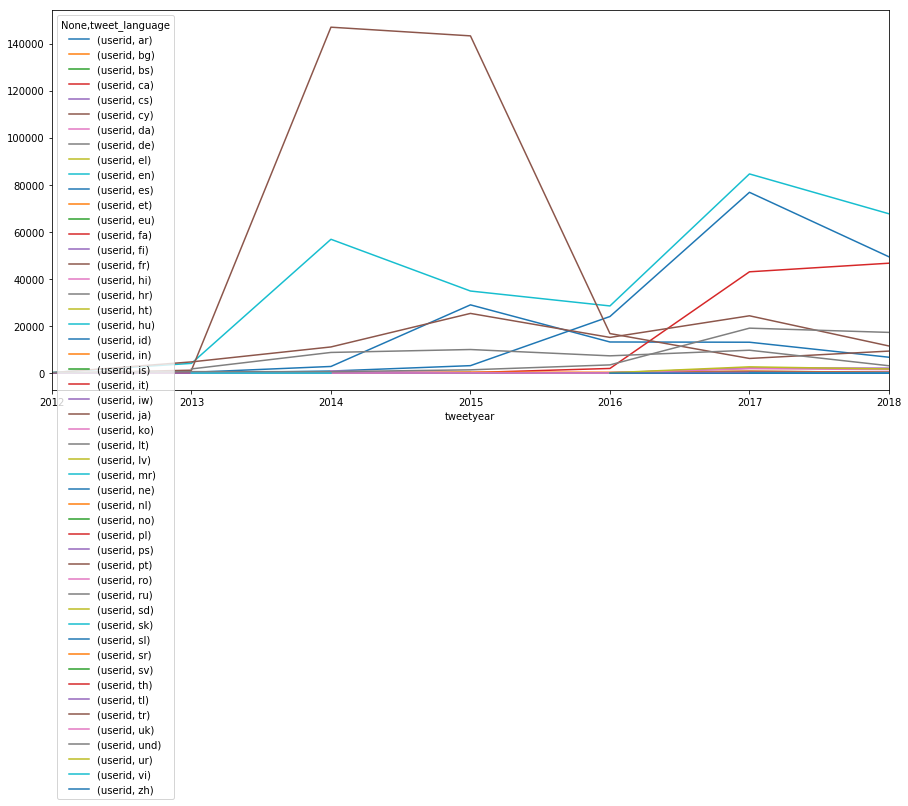

In [26]:
%matplotlib inline
dfbylang = df[['userid', 'tweetyear', 'tweet_language']].pivot_table(index='tweetyear', columns='tweet_language', aggfunc='count')
dfbylang.plot(figsize=(15,7)) #legend=False, 
dfbylang

In [56]:
toplangs = {}
dfbylang2 = dfbylang['userid'].transpose()
for year in range(2010, 2019):
    stryr = str(year)
    try:
        toplangs[stryr] = dfbylang2[dfbylang2[stryr].notnull()].sort_values(stryr, ascending=False)[stryr][:5].to_dict()
        print('{} {}'.format(stryr, toplangs[stryr]))
    except:
        continue

2012 {'en': 273.0, 'und': 214.0, 'tr': 180.0, 'fa': 11.0, 'ar': 3.0}
2013 {'tr': 4765.0, 'en': 4140.0, 'ru': 1784.0, 'fr': 1238.0, 'und': 641.0}
2014 {'fr': 146932.0, 'en': 56844.0, 'tr': 11118.0, 'ru': 8785.0, 'es': 2828.0}
2015 {'fr': 143248.0, 'en': 34868.0, 'es': 28994.0, 'tr': 25360.0, 'ru': 10025.0}
2016 {'en': 28535.0, 'ar': 24044.0, 'fr': 16797.0, 'tr': 15167.0, 'es': 13223.0}
2017 {'en': 84607.0, 'ar': 76796.0, 'fa': 43033.0, 'tr': 24351.0, 'und': 19096.0}
2018 {'en': 67679.0, 'ar': 49406.0, 'fa': 46687.0, 'und': 17299.0, 'tr': 11525.0}


In [57]:
# Okay, who's tweeting most
df['user_screen_name'].value_counts()

marialuis91                                                         265448
a51115862ba4725c846e77683e9c71d1b1eb246100ca394f1b915f9c7909099d    101956
yedisabah                                                            68808
74e1fd475aa82e2aad49acb0c5cf01984f8ecb755509d8174c9e31cc772bd46c     34010
cfb431d28838bc87b3473081cc5899cfede8252c2015644ffeccd7b27b1149fb     28320
1f33d9e4bebd609cdefbf41afeba18c67fece728403a21ae9ff26430748359bd     26591
real_iran                                                            17711
6f2245bc7dd9aa440e83508525b3a79188b4218b2cb662a711701eeadc7c3056     16485
alsaudianet                                                          14579
MeettheNews                                                          12788
alhadathps                                                           12759
alsaudiatimes                                                        12338
alwaienewsnet                                                        12170
harakatweet              

In [58]:
# What the hell is with those long screen names - language?
df[df['user_screen_name'] == 'a51115862ba4725c846e77683e9c71d1b1eb246100ca394f1b915f9c7909099d']

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,tweetyear
502,614018944668708864,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,Brazil,Karima Benhadi,NaN,1137,219,2014-07-16,...,NaN,0.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/politique/coup-d%E2%80%...,[83038893],NaN,2015
503,788944342249504768,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,Brazil,Karima Benhadi,NaN,1137,219,2014-07-16,...,NaN,0.0,0.0,0.0,0.0,"[Finances, Matières]",[],[2751796116],NaN,2016
504,560030321815465985,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,Brazil,Karima Benhadi,NaN,1137,219,2014-07-16,...,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/politique/5853-selon-le...,"[436883897, 103223236]",NaN,2015
505,545605716266868737,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,Brazil,Karima Benhadi,NaN,1137,219,2014-07-16,...,NaN,0.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/divertissements/5807-to...,[577204593],NaN,2014
506,581160429088542720,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,Brazil,Karima Benhadi,NaN,1137,219,2014-07-16,...,NaN,0.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/divertissements/5757-ce...,[2396431578],NaN,2015
507,586513452220473345,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,Brazil,Karima Benhadi,NaN,1137,219,2014-07-16,...,NaN,0.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/soci%C3%A9t%C3%A9/5858-...,[1853696546],NaN,2015
508,570585673771708418,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,Brazil,Karima Benhadi,NaN,1137,219,2014-07-16,...,NaN,0.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/soci%C3%A9t%C3%A9/5911-...,[49571723],NaN,2015
509,622018343172763650,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,Brazil,Karima Benhadi,NaN,1137,219,2014-07-16,...,NaN,0.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/soci%C3%A9t%C3%A9/franc...,[83391760],NaN,2015
510,583280372257021952,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,Brazil,Karima Benhadi,NaN,1137,219,2014-07-16,...,NaN,0.0,0.0,0.0,0.0,"[bourde, plusbellelagauche]",[],[554485198],NaN,2015
511,800291086476476416,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,a51115862ba4725c846e77683e9c71d1b1eb246100ca39...,Brazil,Karima Benhadi,NaN,1137,219,2014-07-16,...,NaN,0.0,0.0,0.0,0.0,[],[],[987313338],NaN,2016


In [65]:
# What languages are the top users writing in?
topusers = df['user_screen_name'].value_counts().index[:10]
dfuserbylang = df[df['user_screen_name'].isin(topusers)][['userid', 'user_screen_name', 'tweet_language']].pivot_table(columns='user_screen_name', index='tweet_language', aggfunc='count')
dfuserbylang

userid  \
user_screen_name 1f33d9e4bebd609cdefbf41afeba18c67fece728403a21ae9ff26430748359bd   
tweet_language                                                                      
ar                                                              2.0                 
bg                                                              NaN                 
bs                                                            248.0                 
ca                                                              1.0                 
cs                                                              NaN                 
cy                                                              2.0                 
da                                                              1.0                 
de                                                              1.0                 
el                                                              NaN                 
en                                                           1577.0                 
es                                                          24603.0                 
et                                                              2.0                 
eu                                                              NaN                 
fa                                                              NaN                 
fi                                                              NaN                 
fr                                                              7.0                 
hi                                                              NaN                 
hr                                                              1.0                 
ht                                                              NaN                 
hu                                                              NaN                 
id                                                              NaN                 
in                                                              3.0                 
is                                                              NaN                 
it                                                              1.0                 
iw                                                              NaN                 
ja                                                              NaN                 
lt                                                              NaN                 
lv                                                              NaN                 
nl                                                              NaN                 
no                                                              NaN                 
pl                                                              NaN                 
pt                                                              1.0                 
ro                                                              5.0                 
ru                                                              NaN                 
sk                                                              NaN                 
sl                                                              1.0                 
sr                                                              NaN                 
sv                                                              NaN                 
tl                                                              3.0                 
tr                                                              NaN                 
uk                                                              NaN                 
und                                                           132.0                 
ur                                                              NaN                 
vi                                                              NaN                 

                                                                               

In [66]:
# Do these answers change if we look at original content (e.g. non-retweets)?
dforig = df[df['is_retweet'] ==  False]
topusers2 = dforig['user_screen_name'].value_counts().index[:10]
dfuserbylang2 = dforig[dforig['user_screen_name'].isin(topusers2)][['userid', 'user_screen_name', 'tweet_language']].pivot_table(columns='user_screen_name', index='tweet_language', aggfunc='count')
dfuserbylang2

userid  \
user_screen_name 1f33d9e4bebd609cdefbf41afeba18c67fece728403a21ae9ff26430748359bd   
tweet_language                                                                      
ar                                                              NaN                 
bg                                                              NaN                 
bs                                                            248.0                 
ca                                                              1.0                 
cs                                                              NaN                 
cy                                                              2.0                 
da                                                              1.0                 
de                                                              1.0                 
en                                                           1572.0                 
es                                                          24603.0                 
et                                                              2.0                 
eu                                                              NaN                 
fa                                                              NaN                 
fi                                                              NaN                 
fr                                                              7.0                 
hi                                                              NaN                 
hr                                                              1.0                 
ht                                                              NaN                 
hu                                                              NaN                 
id                                                              NaN                 
in                                                              3.0                 
is                                                              NaN                 
it                                                              1.0                 
lt                                                              NaN                 
lv                                                              NaN                 
nl                                                              NaN                 
no                                                              NaN                 
pl                                                              NaN                 
pt                                                              1.0                 
ro                                                              5.0                 
ru                                                              NaN                 
sk                                                              NaN                 
sl                                                              1.0                 
sr                                                              NaN                 
sv                                                              NaN                 
tl                                                              3.0                 
tr                                                              NaN                 
uk                                                              NaN                 
und                                                           128.0                 
ur                                                              NaN                 
vi                                                              NaN                 

                                                                                   \
user_screen_name 6f2245bc7dd9aa440e83508525b3a79188b4218b2cb662a711701eeadc7c3056   
tweet_language                                                                      
ar                                                              NaN            

In [68]:
df['tweet_text'].value_counts()

@30356db4488870a022062d1111c504088b776eb3519f06890572d98d5919d06a #JordanNews                                                                                                                                                                                                                       547
@iuvm_arabic #IuvmPress #News #Press #Article #Iuvm #Iuvmorg #IuvmNews #القدس_عاصمة_فلسطين_الأبدية  #JerusalemIsTheEternalCapitalOfPalestine                                                                                                                                                        235
صباح الخير يا اهل لا اله الا الله - حركة الحرية والتغيير                                                                                                                                                                                                                                            210
Contributed Tweets for @a51115862ba4725c846e77683e9c71d1b1eb246100ca394f1b915f9c7909099d are delivered by @Round

In [98]:
dforig['tweet_text'].value_counts()

@30356db4488870a022062d1111c504088b776eb3519f06890572d98d5919d06a #JordanNews                                                                                                                                                                                                                       547
@iuvm_arabic #IuvmPress #News #Press #Article #Iuvm #Iuvmorg #IuvmNews #القدس_عاصمة_فلسطين_الأبدية  #JerusalemIsTheEternalCapitalOfPalestine                                                                                                                                                        235
صباح الخير يا اهل لا اله الا الله - حركة الحرية والتغيير                                                                                                                                                                                                                                            210
Contributed Tweets for @a51115862ba4725c846e77683e9c71d1b1eb246100ca394f1b915f9c7909099d are delivered by @Round

In [ ]:
# Let's look at the meat in the text.  
# Strip it down to the non-repeats (keep the first of each set)
# Strip out the # and @ content
# And then look at what people are talking about

In [94]:
str = 'RT @1fd0ed9f8d4e3966ed7ba6941d24072d6582e9aa0fda18b52635b7d0b8e03b1a: #MBCTheVoice #شي_تتميز_فيه_الكويت #الخميس_الدامي #ذكري #كتابات_منيره #عيسى_قاسم #إرادتنا_إقوى #البحرين #bahrain #المقاو… '
#str = 'RT @libertyfrontpr: #InternationalQudsDay2018   #QudsDay4Return#InternationalQudsDay2018   Stop#NAKBA70  #EuropeanQudsPlatform #BDS #Jerusa… '
wds = str.split(' ')
wds

['RT',
 '@1fd0ed9f8d4e3966ed7ba6941d24072d6582e9aa0fda18b52635b7d0b8e03b1a:',
 '#MBCTheVoice',
 '#شي_تتميز_فيه_الكويت',
 '#الخميس_الدامي',
 '#ذكري',
 '#كتابات_منيره',
 '#عيسى_قاسم',
 '#إرادتنا_إقوى',
 '#البحرين',
 '#bahrain',
 '#المقاو…',
 '']

In [97]:
ddf = pd.DataFrame(wds)
' '.join(ddf[(ddf[0] != '') & (~ddf[0].str[0].isin(['@', '#']))][0].tolist())

'RT'

In [99]:
# Thinking about how viral things go.  How do they get their message out? 

# try this, to check that the user profile doesn't change over time in this dataset
df[df['user_screen_name'] == 'marialuis91']['follower_count'].value_counts()

8012    265448
Name: follower_count, dtype: int64

In [104]:
# So there really are only 660 accounts listed here. That was a surprise. First reaction: 
# that's either really bad bot software, or a really small team
print(len(df['user_screen_name'].unique()))
print(len(dforig['user_screen_name'].unique()))

660
649


In [105]:
# So what the hell software are they using then?
df['tweet_client_name'].value_counts()

Twitter Web Client             699348
TweetDeck                       96561
dlvr.it                         78674
Twitter for Android             62048
Facebook                        58444
Twitter Lite                    23308
Buffer                          16036
Twitter for Websites            13944
RoundTeam                       12157
IFTTT                            8883
Twitter for iPhone               3973
iuvmonline-fa                    3216
TweetItBot                       2744
Google                           2708
blackhouseinfo                   2395
appstwitter1396                  1622
iuvmonline-en                    1617
Twitter for iPad                 1140
Samsung Mobile                    825
4bhnews                           819
iuvm ur                           770
twitter iuvm                      759
IUVM AZ                           629
blackhouseapp                     616
Pinterest                         607
alsaudianet                       507
jordan-times

In [101]:
dfusers = df.drop_duplicates(subset=['user_screen_name'], keep='last')
dfusers

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices,tweetyear
40937,1016023404623880193,461b2f06f5d512e08d1d23a69c79ab094ed5f8535fa02e...,461b2f06f5d512e08d1d23a69c79ab094ed5f8535fa02e...,461b2f06f5d512e08d1d23a69c79ab094ed5f8535fa02e...,NaN,NaN,NaN,0,0,2018-07-08,...,NaN,0.0,0.0,0.0,0.0,[myfirstTweet],[],NaN,NaN,2018
47288,1006900322378215425,f43024b2a740ff8a5513e8a5018cd7687493218dda6453...,f43024b2a740ff8a5513e8a5018cd7687493218dda6453...,f43024b2a740ff8a5513e8a5018cd7687493218dda6453...,"Dallas, TX",student at dallas university,NaN,38,61,2018-06-13,...,NaN,0.0,0.0,0.0,0.0,[],[],NaN,NaN,2018
49277,551865266976862209,cb46c68039e70d6f5b9edd0eba51798cb213d90c5a87c6...,cb46c68039e70d6f5b9edd0eba51798cb213d90c5a87c6...,cb46c68039e70d6f5b9edd0eba51798cb213d90c5a87c6...,NaN,NaN,NaN,18,101,2014-01-20,...,51.324471,0.0,0.0,2.0,0.0,[],[],NaN,NaN,2015
141069,999929245936762880,6e1ba4b22b4ea917ada1b75815f2707cfba4e9d7ad66af...,6e1ba4b22b4ea917ada1b75815f2707cfba4e9d7ad66af...,6e1ba4b22b4ea917ada1b75815f2707cfba4e9d7ad66af...,Ohio,politic music book,NaN,63,47,2018-05-24,...,NaN,0.0,0.0,0.0,0.0,[],[],[997963853576077312],NaN,2018
207702,1004700476758085633,448a9dc88a1995730e6bb25542d9b0c52edad789918848...,448a9dc88a1995730e6bb25542d9b0c52edad789918848...,448a9dc88a1995730e6bb25542d9b0c52edad789918848...,"Ohio, USA",journalist,NaN,105,190,2018-05-24,...,NaN,0.0,0.0,0.0,0.0,[],[],[95eac414c09311b6317e44ec7d57f2d3fc08fbd8062c5...,NaN,2018
242556,921595415954202625,3d47c363b9d4832906b8dd1bbea16633837d4547179134...,3d47c363b9d4832906b8dd1bbea16633837d4547179134...,3d47c363b9d4832906b8dd1bbea16633837d4547179134...,NaN,NaN,NaN,0,0,2017-10-21,...,NaN,0.0,0.0,0.0,0.0,[نخستین‌توییت],[],NaN,NaN,2017
283378,997232862167363584,d9c793fb71c27e300d50b2ad3e8a53612163042aa6b637...,d9c793fb71c27e300d50b2ad3e8a53612163042aa6b637...,d9c793fb71c27e300d50b2ad3e8a53612163042aa6b637...,US,Islam LOVE,NaN,0,0,2018-05-17,...,NaN,0.0,0.0,0.0,0.0,[],[],NaN,NaN,2018
357521,889967299083599873,326883200f7bd1c69499e7dc45584b709d55fffb58ca83...,326883200f7bd1c69499e7dc45584b709d55fffb58ca83...,326883200f7bd1c69499e7dc45584b709d55fffb58ca83...,NaN,♥️♥️وَقُلْ جَاءَ الْحَقُّ وَزَهَقَ الْبَاطِلُ ...,NaN,1,2,2017-07-25,...,NaN,0.0,0.0,0.0,1.0,[myfirstTweet],[],NaN,NaN,2017
431720,993283904923668480,b93dd3283e7aa464037ddf986b5586af019098aca152a2...,b93dd3283e7aa464037ddf986b5586af019098aca152a2...,b93dd3283e7aa464037ddf986b5586af019098aca152a2...,NaN,NaN,NaN,0,4,2018-02-14,...,NaN,0.0,0.0,0.0,0.0,[],[http://www.bbc.com/persian/iran-44009154],NaN,NaN,2018
441597,1006620250245357570,2de6ce32554d846a19977adce70e4f2dc2d6351f6e7b6e...,2de6ce32554d846a19977adce70e4f2dc2d6351f6e7b6e...,2de6ce32554d846a19977adce70e4f2dc2d6351f6e7b6e...,NaN,NaN,NaN,8,98,2018-01-01,...,NaN,0.0,0.0,0.0,0.0,[شهادت],[],NaN,NaN,2018


In [114]:
# What at the follower counts like, and what do accounts claim to be
dfusers.sort_values('follower_count', ascending=False)[['user_screen_name', 'follower_count', 'user_profile_description']]

,user_screen_name,follower_count,user_profile_description
1122868,alsaudiatimes,41489,https://t.co/gr4NebQYFB https://t.co/bGmH5d8UlJ
1121458,SahatAlbalad,29522,‏‏‏أحداث تقع في البلد، يجب أن يرويها أهل البلد...
1122222,alhadathps,23614,نهتم بنشر وتحليل الأخبار السياسية والأحداث الم...
1122062,harakatweet,21839,حركة الحرية و التغيير في شبه الجزيرة العربية ...
1121274,Ahrar_TV,19783,‏‏‏‏‏‏‏‏خدمة إخبارية تابعة لـ مركز أحرار للإنت...
1122933,toons_online,18445,the first News-Toons website to be at your des...
1121449,al_sa7a,15177,نروي لكم ما يدور بساحة البلد بكل صدق و شفافية ...
1121490,Eqlimolsharq,15113,من قلب الحدث - نروي لكم الأخبار بكل مصداقية و ...
1121675,Yaghqi,14767,لیکن رفیق بر همه چیز مقدم است
1121895,yedisabah,14365,"haberi doğru kaynaktan alın! / Haberler, makal..."
